In [1]:
import sys
import numpy as np
import pandas as pd
from fortran import fortran
import matplotlib.pyplot as plt

In [2]:
# READING INPUT DATA
#n = input("Write the number of nanoparticles")
#mcs = input("Write the number of Monte Carlo steps")
#dThet = float(input("Write the angle dThet in degrees"))
n = 1000
mcs = 40
dThet = 10
pi = np.pi
dThet = dThet*pi/180.0

# DECLARING ARRAYS
mag = np.empty(shape=(int(n),3))
ku = np.empty(shape=(int(n),3))
xyz = np.empty(shape=(int(n),3))
vecH = np.empty(shape=(1,3))
hextStg = np.empty(shape=(3,3))
mhCurve = np.empty(shape=(int(n),2))

In [3]:
# DECLARING FORTRAN SUBROUTINES abc, calcul, arrays, mat_totalArray 
abc = fortran.subr1
hextCalc = fortran.subr2
randomArrays = fortran.subr3
magTotalSet = fortran.subr4

In [4]:
# FILLING ARRAYS mag, ku
mag, ku, xyz = randomArrays(pi,n)
magInit = mag

# FILLIN FILES magData.txt and xyzData.txt
with open("magData.txt","wb") as file:
    np.savetxt(file,mag,delimiter="\t")
with open("xyzData.txt","wb") as file:
    np.savetxt(file,xyz,delimiter="\t")
    
# ERASING TRASH DATA IN mhData.txt
with open("mhData.txt", "w"):
    pass

In [5]:
dfMag = pd.DataFrame(data=mag[0:,0:],columns=['x','y','z']) # CREATE DATAFRAME FOR ARRAY
dfXyz = pd.DataFrame(data=xyz[0:,0:],columns=['x','y','z']) 

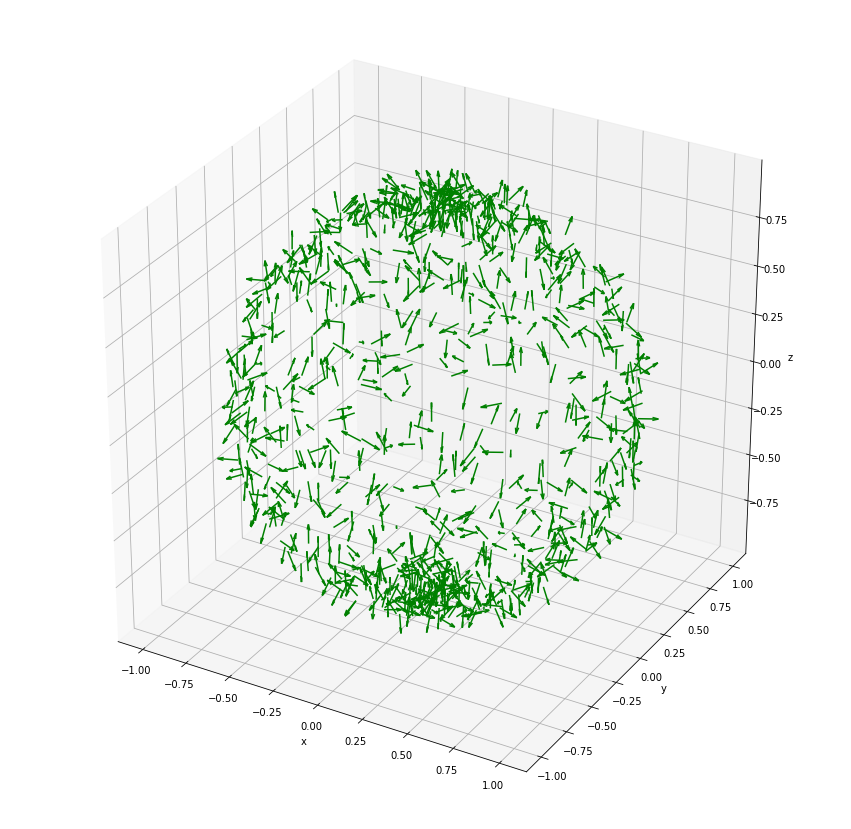

In [6]:
#Normal 3D plot
#%matplotlib inline 
#Interactive 3D plot
#%matplotlib qt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dfMag.x, dfMag.y, dfMag.z, color = 'r', marker = 'o', alpha = 0.5)
#ax.quiver(*dfMag[:-1].T.values, *(dfMag.shift(-1)-dfMag)[:-1].T.values , length=0.1)
ax.quiver(dfXyz.x, dfXyz.y, dfXyz.z,dfMag.x, dfMag.y, dfMag.z, length=0.1, color='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [7]:
# INITIALIZING VARIABLES
vecH = np.array([1.0,0.0,0.0]) # FIELD DIRECTION
hext_stg = np.array([
    [0.0,1.0,60.0], # INITIAL, FINAL, STEP NUMBER
    [1.0,-1.0,100.0],
    [-1.0,1.0,100.0]
])
dh = (1.0-0.0)/100.0
hext = 0.0

In [8]:
# SETTING magTotal
magTotal = magTotalSet(mag, vecH,n)

In [9]:
# FILLING DATAFRAME AND ARRAY
df = pd.DataFrame([
    [hext, magTotal]
], columns = ["hext", "MagTotal"])
mhCurve[0,0] = hext
mhCurve[0,1] = magTotal

In [10]:
# INITIALIZING VARIABLE nhext
nhext = int(hext_stg[0,2]+hext_stg[1,2]+hext_stg[2,2]-3.0)

In [11]:
# SETTING magTotal AND DATAFRAME USING MARKOV CHAINS
for i in range(0,nhext):    
    hext = hextCalc(hext,dh,hext_stg,i)
    for step in range(0,int(mcs)):
        for nanoparticle in range(0,int(n)):
            randN = round(np.random.rand()*(n-1)) #Random Nanoparticle
            mag[randN] = abc(vecH, hext, dThet, ku[randN], pi, mag[randN])  #THIS IS THE VALUE THAT I WANT TO PLOT DYNAMICALLY
    # FILLING FILE magData.txt
    with open("magData.txt","wb") as file:
        np.savetxt(file,mag,delimiter="\t")
    magTotal = magTotalSet(mag, vecH,n)   
    print(i,hext,magTotal)
    df.loc[i+1]=[hext,magTotal]
    # FILLING FILE mhData.txt
    mhCurve[i+1,0] = hext
    mhCurve[i+1,1] = magTotal
    with open('mhData.txt','wb') as file2:
        np.savetxt(file2,mhCurve,delimiter="\t")

0 0.01694915254237288 5.304735708516831
1 0.03389830508474576 8.958892761455846
2 0.05084745762711865 40.98987973598003
3 0.06779661016949153 65.90332014903052
4 0.0847457627118644 76.85485195812635
5 0.10169491525423728 95.65635801682528
6 0.11864406779661016 108.25162036938669
7 0.13559322033898305 128.035640390129
8 0.15254237288135594 134.29262476380828
9 0.16949152542372883 166.98393289135652
10 0.18644067796610173 186.54556129413552
11 0.20338983050847462 212.4337594414997
12 0.2203389830508475 229.8742176719413
13 0.2372881355932204 240.4652476316238
14 0.25423728813559326 269.1987499697603
15 0.27118644067796616 290.24718420079773
16 0.28813559322033905 306.244827795606
17 0.30508474576271194 332.9232322916415
18 0.32203389830508483 360.56073968703856
19 0.3389830508474577 388.7725705575296
20 0.3559322033898306 417.66300176051624
21 0.3728813559322035 429.53275655027306
22 0.3898305084745764 448.9145059851251
23 0.4067796610169493 463.97551279479967
24 0.4237288135593222 483.8

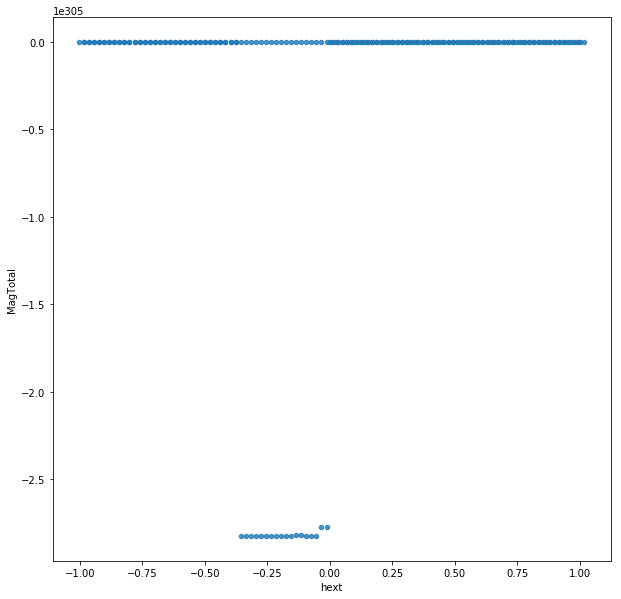

In [12]:
# PLOTTING HYSTERESIS LOOP
df.plot.scatter(x='hext',y='MagTotal',alpha=0.8, figsize=(10,10))
plt.show()

In [13]:
dfMag = pd.DataFrame(data=mag[0:,0:],columns=['x','y','z']) # CREATE DATAFRAME FOR ARRAY
dfKu = pd.DataFrame(data=ku[0:,0:],columns=['x','y','z']) 

/home/vizi/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2389: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


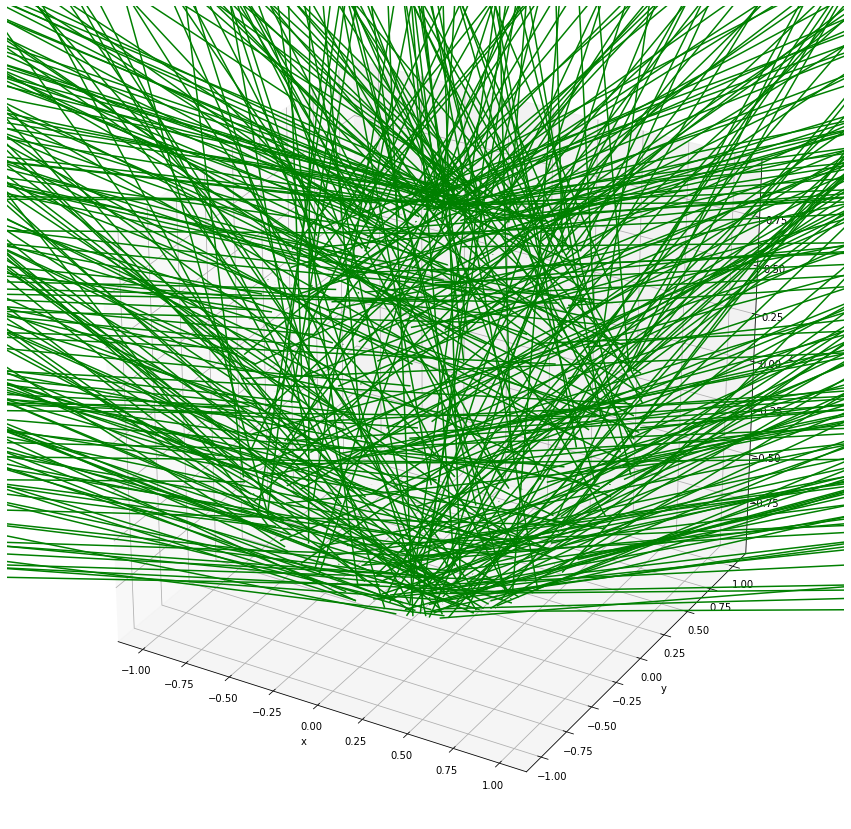

In [14]:
#Normal 3D plot
#%matplotlib inline 
#Interactive 3D plot
#%matplotlib qt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(dfXyz.x, dfXyz.y, dfXyz.z,dfMag.x, dfMag.y, dfMag.z, length=0.1, color='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [15]:
with open("magData.txt","wb") as file:
    np.savetxt(file,mag,delimiter="\t")